<a href="https://colab.research.google.com/github/FerrazThales/Churn_prediction/blob/main/Churn_Prediction_para_uma_empresa_de_Telecomunica%C3%A7%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img width="32%" src="https://github.com/FerrazThales/FerrazThales/blob/main/logo_gif.gif?raw=true">

[Thales Ferraz 👨‍💻 | Data Scientist](https://thalesferraz.medium.com/)

* Visite também o meu artigo sobre esta análise no [Medium]()

* Visite mais projetos do meu portfólio no [Github](https://bit.ly/3DQyZHu)

* Vamos trocar mais idéias sobre Data Science no [LinkedIn](https://www.linkedin.com/in/thalesdefreitasferraz/)?


# *Você vai aprender aqui*

* O que é **Churn** e como isso pode ser **importante** para o seu negócio.
* Quais os **tipos de dados** são os melhores para serem utilizados neste problema.
* Trabalhar com variáveis **categóricas** e **númericas**.
* Como algoritmos de **classificação supervisionados** podem nos ajudar nestas situações.

# Churn Prediction

Clientes são considerados um dos grandes **ativos** de um negócio. Em um cenário **competitivo** em que o cliente possui inúmeras opções de escolhas, é necessário tentar fornecer a melhor experiência possível para os seus consumidores.

*Churn rate*, ou simplesmente *churn*, representa a **taxa de evasão** da sua base de clientes. Em serviços como Spotify ou Netflix ela representaria a **taxa de cancelamento** de assinaturas em um determinado período.

<p align=center>
<img src="https://cdn.pixabay.com/photo/2017/10/03/19/17/bad-review-2813741_960_720.png" width="40%"></p>

Esta taxa de cancelamento é de extrema importância para o **gerenciamento** e sua análise ao longo do tempo pode mostrar que existe algum **problema** que deve ser **atacado**. Já que se considera que os custos  para conquistar um **novo** cliente pode ser até 15x maior do que o para reter um cliente **atual**.

Uma análise preditiva de *Churn* ajudará a identificar **potenciais cancelamentos** com um tempo de antecedência. Desta forma, possibilita a empresa a promover ações direcionadas para tentar **reter** os clientes que estão insatisfeitos. Ou até mesmo, avaliar se compensa manter estes clientes considerando as **receitas** que eles proporcionam.

## Obtenção dos Dados

Os dados utilizados neste projeto foram **originalmente** disponibilizados na [plataforma de ensino da IBM Developer](https://developer.ibm.com/technologies/data-science/patterns/predict-customer-churn-using-watson-studio-and-jupyter-notebooks/#), e tratam de um problema **típico** de uma companhia de **telecomunicações**. O *dataset* completo pode ser encontrado [neste link](https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv).

É importante ressaltar que estes tipos de dados são extremamente utilizados para elaborar uma **estratégia de negócios**, portanto não são fáceis de se obter informações **atualizadas**.


Para um melhor entendimento de nosso banco de dados foi elaborado um **pequeno dicionário** das variáveis:

* *customerID*: identificação única do usuário na empresa.
* *gender*: gênero do usuário.
* *SeniorCitizen*: Se o cliente é idoso ou não.
* *Partner*: Se o cliente possui acompanhante ou não.
* *Dependents*: Se o cliente possui dependentes.
* *tenure*: Período em que o cliente está na empresa.
* *PhoneService*: Se o cliente optou por serviços telefônicos.
* *MultipleLines*: Se o cliente possui múltiplas linhas de telefone.
* *InternetService*: Se o cliente optou por serviços de internet.
* *OnlineSecurity*: Se o cliente optou pelos serviços de segurança na internet.
* *OnlineBackup*: Se o cliente optou por serviços de backup na internet.
* *DeviceProtection*: Se o cliente optou por serviços de proteção de seu equipamento.
* *TechSupport*: Se o cliente optou por serviços de ajuda técnica na internet.
* *StreamingTV*: Se o cliente optou por serviços de streaming na TV.
* *StreamingMovies*: Se o cliente optou por serviços de streaming para Filmes.
* *Contract*: Tipo de contrato do cliente (mensal, anual ou de dois anos).
* *PaperlessBilling*:
* *PaymentMethod*: Forma de pagamento (cheque eletrônico - [sim, existiu](https://www1.folha.uol.com.br/fsp/1996/1/31/dinheiro/12.html); um cheque por e-mail - [sim,existiu](https://forum.wordreference.com/threads/a-mailed-check-must-clear-the-bank.866139/) ; transferência bancária e cartão de crédito.
* *MonthlyCharges*: Recargas mensais.
* *TotalCharges*: Recargas durante todo o período em que o cliente está na empresa.
* *Churn*: Se o cliente abandonou a empresa.

In [1]:
#retirando warnings do código
import warnings
warnings.filterwarnings('ignore')

# importar os módulos padrão
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#módulos do sklearn
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import plot_confusion_matrix

#importando o Classificador do xgboost
from xgboost import XGBClassifier

#algoritmo para under sampling (balanceamento dos dados)
from imblearn.under_sampling import RandomUnderSampler

In [2]:
# importar os dados
endereco_dos_dados = "https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(endereco_dos_dados)

# ver as 5 primeiras entradas
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Análise Exploratória dos Dados

In [3]:
#Avaliando o tamanho do dataset
print('Este dataset contém:')
print('{:,} entradas'.format(df.shape[0]).replace(',','.'))
print('{} variáveis'.format(df.shape[1]))

Este dataset contém:
7.043 entradas
21 variáveis


In [4]:
#Tipo de variáveis de nossa base de dados
pd.DataFrame(df.dtypes,columns=['Tipo de Dados'])

,Tipo de Dados
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


Existem muitas variáveis do tipo *object* que precisam ser **convertidas** para variáveis **númericas**. Esta conversão tem o intuito de melhorar a **perfomance** de nossos algoritmos. Uma das principáis variáveis nesta situação é o **Churn** que posteriormente terá um melhor tipo de tratamento.

In [5]:
#Avaliando a quantidade de valores ausentes
pd.DataFrame(df.isnull().sum(),columns=['Quantidade de valores ausentes'])

,Quantidade de valores ausentes
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


Aparentemente não existem valores vazios, mas vamos **observar** um pouco mais algumas samples.

In [6]:
df[['customerID','gender','tenure','MonthlyCharges','TotalCharges','Churn']][df['customerID'] == '2923-ARZLG']

,customerID,gender,tenure,MonthlyCharges,TotalCharges,Churn
5218,2923-ARZLG,Male,0,19.7,,No


Ao analisar um pouco mais a variável **tenure**, notamos que quando ela apresenta valor **zero** (ou seja, o cliente ainda não completou um período na empresa) o valor da variável **TotalCharges** está vazio.

In [7]:
df[['customerID','gender','tenure','MonthlyCharges','TotalCharges','Churn']][df['tenure'] == 0]

,customerID,gender,tenure,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,52.55,,No
753,3115-CZMZD,Male,0,20.25,,No
936,5709-LVOEQ,Female,0,80.85,,No
1082,4367-NUYAO,Male,0,25.75,,No
1340,1371-DWPAZ,Female,0,56.05,,No
3331,7644-OMVMY,Male,0,19.85,,No
3826,3213-VVOLG,Male,0,25.35,,No
4380,2520-SGTTA,Female,0,20.00,,No
5218,2923-ARZLG,Male,0,19.70,,No
6670,4075-WKNIU,Female,0,73.35,,No


In [8]:
#mudando o TotalCharges para float
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [9]:
#Avaliando a quantidade de valores ausentes após transformar em float
pd.DataFrame(df.isnull().sum(),columns=['Quantidade de valores ausentes'])

,Quantidade de valores ausentes
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


Ao **converter** a variável **TotalCharges** em float, surgem 11 valores **vazios**. Estes valores são todos os que tem o **tenure** igual a zero.

In [10]:
df[['customerID','gender','tenure','MonthlyCharges','TotalCharges','Churn']][df['customerID'] == '2923-ARZLG']

,customerID,gender,tenure,MonthlyCharges,TotalCharges,Churn
5218,2923-ARZLG,Male,0,19.7,NaN,No


A partir desta análise, vamos **desconsiderar** todos os dados em que a variável **tenure** é zero, já que são clientes que acabaram de ingressar na empresa e naturalmente **não** irão influenciar na taxa de Churn.

In [11]:
#tratamento dos valores vazios
df.dropna(inplace=True)

In [12]:
#estatistica descritiva de nossos dados após desconsiderar clientes que acabaram de ingressar na empresa
df.describe().round(2)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.00,7032.00,7032.00,7032.00
mean,0.16,32.42,64.80,2283.30
std,0.37,24.55,30.09,2266.77
min,0.00,1.00,18.25,18.80
25%,0.00,9.00,35.59,401.45
50%,0.00,29.00,70.35,1397.48
75%,0.00,55.00,89.86,3794.74
max,1.00,72.00,118.75,8684.80


Verificamos que as variávies **ternure**, **MonthlyCharges** e **TotalCharges** possuem desviões padrões muito **acentuados** em relação a média.

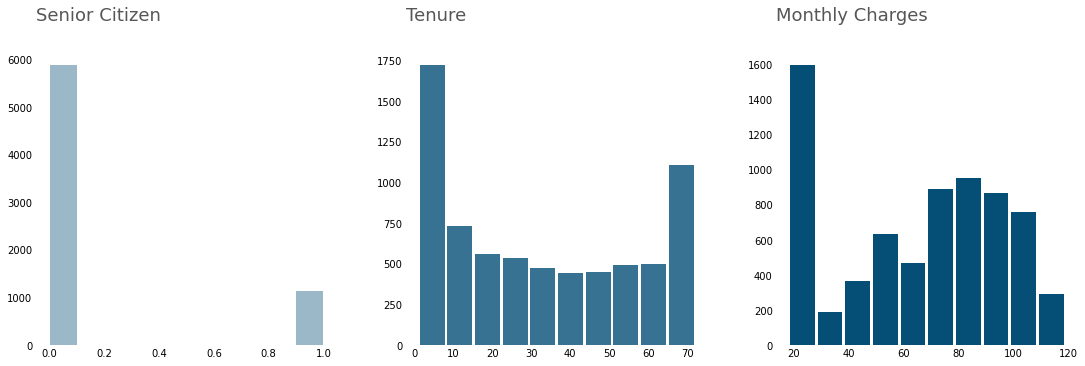

In [14]:
#criando os outputs do matplotlib
fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

#primeiro gráfico
df['SeniorCitizen'].hist(ax=ax[0],grid=False,color='#054F77',alpha=0.4).set_frame_on(False)
ax[0].set_title('Senior Citizen',loc='left',pad=30,fontdict={'fontsize':18,'Family':'Dejavu Sans'},color='#565656')
ax[0].tick_params(axis='both',which='both',length=0)

#segundo gráfico
df['tenure'].hist(ax=ax[1],grid=False,rwidth=0.9,color='#054F77',alpha=0.8).set_frame_on(False)
ax[1].set_title('Tenure',loc='left',pad=30,fontdict={'fontsize':18,'Family':'Dejavu Sans'},color='#565656')
ax[1].tick_params(axis='both',which='both',length=0)

#terceiro gráfico
df['MonthlyCharges'].hist(ax=ax[2],grid=False,rwidth=0.9,color='#054F77',alpha=1.0).set_frame_on(False)
ax[2].set_title('Monthly Charges',loc='left',pad=30,fontdict={'fontsize':18,'Family':'Dejavu Sans'},color='#565656')
ax[2].tick_params(axis='both',which='both',length=0)

#exibir o gráfico
plt.tight_layout(pad=4.0);

Pela análise dos histogramas, podemos notar que:
* A maioria de clientes de nossa base de dados não são idosos.
* Grande parte dos dados são de clientes recentes (variável Tenure).
* O maior número de recargas mensais são dos menores valores.

In [15]:
#função para adicionar os labels
def addlabels(x,y):
  for i in range(len(x)):
    ax.annotate(y[i],xy=(i,y[i]),xytext=(i-0.13,y[i]+100),fontsize=18,fontfamily='Dejavu Sans',color='grey')  

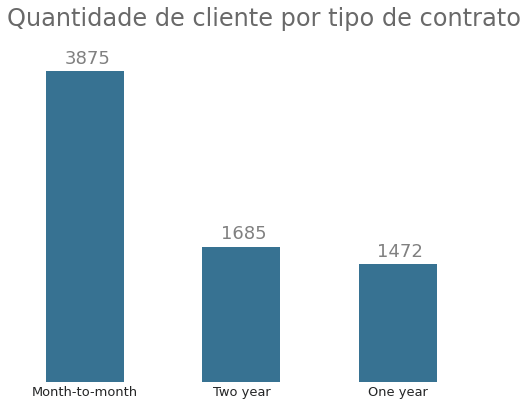

In [16]:
#criando o figure e o ax no matplotlib
fig, ax = plt.subplots(figsize=(8,6))

#quantidade dos principais tipos de serviço
df['Contract'].value_counts().plot(kind='bar',rot=0,ax=ax,color='#054F77',alpha=0.8).set_frame_on(False)
ax.get_yaxis().set_visible(False)
ax.set_title('Quantidade de cliente por tipo de contrato',loc='left',pad=30,fontdict={'fontsize':24,'Family':'Dejavu Sans'},color='dimgrey')
ax.tick_params(axis='x',length=0,labelsize=13,labelcolor='#242526')

#adicionando os rótulos ao gráfico
addlabels(df['Contract'].unique(),df['Contract'].value_counts())

#exibir o gráfico
plt.tight_layout(pad=2.0);

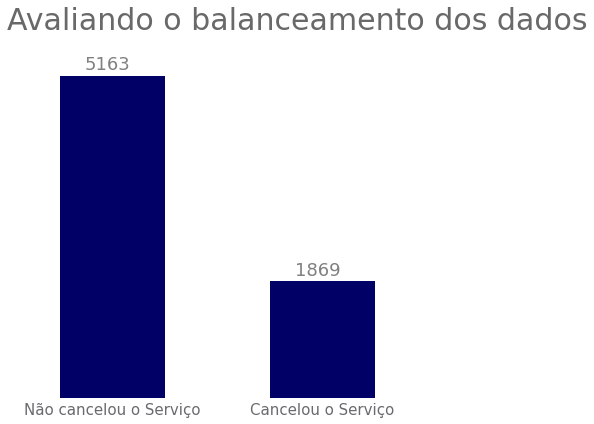

In [17]:
#criando o figure e o axes no matplotlib 
fig, ax = plt.subplots(figsize=(8,6))

#Verificando o balanceamento dos dados
df.Churn.value_counts().plot.bar(ax=ax,color='#000066',rot=0).set_frame_on(False)
ax.get_yaxis().set_visible(False)
ax.tick_params(axis='x',length=0,labelsize=13,labelcolor='#242526')
ax.set_xticklabels(['Não cancelou o Serviço','Cancelou o Serviço'],fontdict={'fontsize':15},color='#6a6a6f')
ax.set_title('Avaliando o balanceamento dos dados',loc='left',pad=30,fontdict={'fontsize':30},color='dimgrey')
addlabels(df.Churn.unique(),df.Churn.value_counts())

#plotando o gráfico
plt.tight_layout();

## Preparando os Dados e elaborando os modelos

Já notamos que a variável-alvo Churn se encontra como uma **string** ("Yes", "No"). Este tipo de dado **dificulta** o aprendizado do algoritmo, portanto é necessário realizar uma transformação destas **labels** em variáveis **numéricas**. Uma boa opção é utilizar o [Label Encoder]('https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html').


In [13]:
#mudando o Churn para variável númerica
df['Churn'] = LabelEncoder().fit_transform(df['Churn'])

Inicialmente precisamos separar as variáveis nos termos x e y. Além disso, é necessário diferenciar os dados de treino e teste. 

In [18]:
#definindo x e y
x=df.drop(['customerID','Churn'],axis=1)
y=df.Churn

#dividindo os dados em treino e teste
x_train,x_test,y_train,y_test = train_test_split(x,y)

Como anteriormente vimos, os dados estão um pouco **desbalanceados**. Ou seja, há uma "preferência" maior para que determinados dados aparecem mais vezes. Uma maneira de tentar abrandar este efeito é com o uso do [Random Under Sampler]('https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html').




In [19]:
#balanceamento dos dados -> usando técnica de undersampling -> elimina aleatoriamente entrada da classe com maior número de ocorrências
x_rus,y_rus = RandomUnderSampler().fit_sample(x_train,y_train)

Além disso, nossas variáveis precisam ser tratadas de formas **diferentes**. Algumas precisam de transformações categóricas e outras númericas.Uma boa maneira de realizar estas transformações de forma **conjunta** é utilizar o [ColumnTransformer]('https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html').

Utilizamos o **StandarScaler** para diminuir a escala do intervalo de dados, **padronizando** através de uma distribuição normal.

E utilizamos o **OneHotEncoder** para transformar variáveis categóricas em númericas, considerando que **não** há uma hierarquia dentro dos valores destas variáveis.

In [20]:
#Separando as variáveis númericas
standard_numeric_features = ['tenure','MonthlyCharges','TotalCharges']

#Instanciando o StandardScaler
standard_numeric_transformer = StandardScaler()

#Separando as variáveis cartegóricas
categorical_features = ['gender','Partner','Dependents',
      'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
      'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

#Instanciando o OneHotEncoder
categorical_transformer = OneHotEncoder(sparse=False)

#Realizando transformações diferentes para as colunas
preprocessor = ColumnTransformer(transformers=[('num_stardard',standard_numeric_transformer,standard_numeric_features),
                                               ('cat',categorical_transformer,categorical_features)])

Como temos uma variável alvo definida, nosso algoritmo utilizado será do tipo **supervisionado**. Também, por querermos realizar uma **"escolha"** desta variável alvo, ou seja, queremos saber apenas se o cliente sairá ou não da empresa nosso algoritmo será de **Classificação**.

Dois algoritmos de classificação interessantes para se utilizar nestes tipos de problema são a **Regressão Logística** e o **XGBoost**.

Nesta análise também será utilizado o recurso [Grid Search]('https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html') que tem o objetivo de avaliar qual é o melhor modelo gerado considerando os intervalos de valores de hiperparâmetros escolhidos.

### Regressão Logística

> Utilizando os dados balanceados

In [21]:
#Criando a Pipeline de preprocessamento para as variáveis
clf_logis = Pipeline(steps=[('preprocessor',preprocessor),('classifier',LogisticRegression(random_state=42))])

#Criando os parâmetros do GridSearchCV
param_grid_logis = {'classifier__C':[0.01,0.1,1.0,10,100]}

#Instanciando o GridSearchCV
grid_search_logis_balanceados = GridSearchCV(clf_logis,param_grid_logis,cv=5)

#treinando o modelo
grid_search_logis_balanceados.fit(pd.DataFrame(x_rus,columns=x_train.columns),y_rus);

In [22]:
print("model score: %.3f" % grid_search_logis_balanceados.score(x_test, y_test))

model score: 0.757


> Utilizando os dados não balanceados

In [23]:
#Criando a Pipeline de preprocessamento para as variáveis
clf_logis = Pipeline(steps=[('preprocessor',preprocessor),('classifier',LogisticRegression(random_state=42))])

#Criando os parâmetros do GridSearchCV
param_grid_logis = {'classifier__C':[0.01,0.1,1.0,10,100]}

#Instanciando o GridSearchCV
grid_search_logis_desbalanceados = GridSearchCV(clf_logis,param_grid_logis,cv=5)

#treinando o modelo
grid_search_logis_desbalanceados.fit(x_train,y_train);

In [24]:
print("model score: %.3f" % grid_search_logis_desbalanceados.score(x_test, y_test))

model score: 0.809


### XGBoost

> Utilizando os dados balanceados

In [25]:
#Criando a Pipeline de preprocessamento para as variáveis
clf_xgb = Pipeline(steps=[('preprocessor',preprocessor),('classifier',XGBClassifier(random_state=42))])

#Criando os parâmetros do GridSearchCV
param_grid_xgb = {'classifier__n_estimators':[50,100,300],
                  'classifier__learning_rate':[0.03,0.05,0.07],
                  'classifier__max_depth':[3,5,7],
                  'classifier__subsample':[0.3,0.5,0.7],
                  'classifier__gamma':[0,1]}

#Instanciando o GridSearchCV
grid_search_xgb_balanceados = GridSearchCV(clf_xgb,param_grid_xgb,cv=5)

#treinando o modelo
grid_search_xgb_balanceados.fit(pd.DataFrame(x_rus,columns=x_train.columns),y_rus);

In [26]:
print("model score: %.3f" % grid_search_xgb_balanceados.score(x_test, y_test))

model score: 0.743


In [27]:
grid_search_xgb_balanceados.best_params_

{'classifier__gamma': 1,
 'classifier__learning_rate': 0.07,
 'classifier__max_depth': 3,
 'classifier__n_estimators': 50,
 'classifier__subsample': 0.7}

> Utilizando os dados desbalanceados

In [28]:
#Criando a Pipeline de preprocessamento para as variáveis
clf_xgb = Pipeline(steps=[('preprocessor',preprocessor),('classifier',XGBClassifier(random_state=42))])

#Criando os parâmetros do GridSearchCV
param_grid_xgb = {'classifier__n_estimators':[50,100,300],
                  'classifier__learning_rate':[0.03,0.05,0.07],
                  'classifier__max_depth':[3,5,7],
                  'classifier__subsample':[0.3,0.5,0.7],
                  'classifier__gamma':[0,1]}

#Instanciando o GridSearchCV
grid_search_xgb_desbalanceados = GridSearchCV(clf_xgb,param_grid_xgb,cv=5)

#treinando o modelo
grid_search_xgb_desbalanceados.fit(x_train,y_train);

In [29]:
print("model score: %.3f" % grid_search_xgb_desbalanceados.score(x_test, y_test))

model score: 0.805


In [30]:
grid_search_xgb_desbalanceados.best_params_

{'classifier__gamma': 1,
 'classifier__learning_rate': 0.05,
 'classifier__max_depth': 3,
 'classifier__n_estimators': 100,
 'classifier__subsample': 0.3}

## Matriz de Confusão dos Modelos

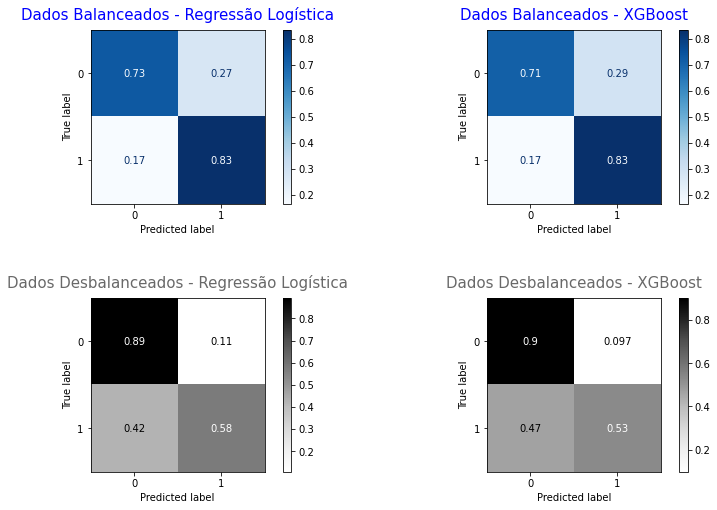

In [31]:
#criando o figure e o axes no matplotlib 
fig, ax = plt.subplots(figsize=(12,8),ncols=2,nrows=2)

#primeiro gráfico -> Regressão Logística Dados balanceados
plot_confusion_matrix(grid_search_logis_balanceados,x_test,y_test,normalize='true',ax=ax[0][0],cmap='Blues');
ax[0][0].set_title('Dados Balanceados - Regressão Logística',loc='center',pad=10,fontdict={'fontsize':15},color='blue')

#segundo gráfico -> XGBoost Dados balanceados
plot_confusion_matrix(grid_search_xgb_balanceados,x_test,y_test,normalize='true',ax=ax[0][1],cmap='Blues');
ax[0][1].set_title('Dados Balanceados - XGBoost',loc='center',pad=10,fontdict={'fontsize':15},color='blue')

#terceiro gráfico -> Regressão Logística Dados desbalanceados
plot_confusion_matrix(grid_search_logis_desbalanceados,x_test,y_test,normalize='true',ax=ax[1][0],cmap='Greys');
ax[1][0].set_title('Dados Desbalanceados - Regressão Logística',loc='center',pad=10,fontdict={'fontsize':15},color='dimgrey')

#quarto gráfico -> XGBoost Dados desbalanceados
plot_confusion_matrix(grid_search_xgb_desbalanceados,x_test,y_test,normalize='true',ax=ax[1][1],cmap='Greys');
ax[1][1].set_title('Dados Desbalanceados - XGBoost',loc='center',pad=10,fontdict={'fontsize':15},color='dimgrey')

#plotando o gráfico
plt.tight_layout(pad=4.0);

Nosso objetivo principal é saber qual cliente tem maior tendência a sair da empresa. Portanto, estamos mais interessados quando o modelo prevê esta saída e o cliente de fato saiu.

Pela análise das matrizes de confusão, avaliamos que obtemos melhores resultados para os dados que foram balanceados.

colocar o AUC como métrica

## Conclusões

* isso
* aquilo
* aquilo lá